In [4]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import numpy as np
from tqdm.notebook import tqdm
import os
import pandas as pd

In [5]:
TRAIN_DIR = 'Dataset/images/train'
TEST_DIR = 'Dataset/images/test'

In [6]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [7]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)

                                        image     label
0            Dataset/images/train\angry\0.jpg     angry
1            Dataset/images/train\angry\1.jpg     angry
2           Dataset/images/train\angry\10.jpg     angry
3        Dataset/images/train\angry\10002.jpg     angry
4        Dataset/images/train\angry\10016.jpg     angry
...                                       ...       ...
28816  Dataset/images/train\surprise\9969.jpg  surprise
28817  Dataset/images/train\surprise\9985.jpg  surprise
28818  Dataset/images/train\surprise\9990.jpg  surprise
28819  Dataset/images/train\surprise\9992.jpg  surprise
28820  Dataset/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)

                                        image     label
0            Dataset/images/train\angry\0.jpg     angry
1            Dataset/images/train\angry\1.jpg     angry
2           Dataset/images/train\angry\10.jpg     angry
3        Dataset/images/train\angry\10002.jpg     angry
4        Dataset/images/train\angry\10016.jpg     angry
...                                       ...       ...
28816  Dataset/images/train\surprise\9969.jpg  surprise
28817  Dataset/images/train\surprise\9985.jpg  surprise
28818  Dataset/images/train\surprise\9990.jpg  surprise
28819  Dataset/images/train\surprise\9992.jpg  surprise
28820  Dataset/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [12]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [21]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
input_shape = (48, 48, 1)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())

# Fully Connected 1st Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# Output layer
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Qc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json) 
model.save("emotiondetector.h5")#
print("Model saved to disk")

Epoch 1/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 703s 2s/step - accuracy: 0.2310 - loss: 1.8306 - val_accuracy: 0.2617 - val_loss: 1.7655
Epoch 2/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 688s 1s/step - accuracy: 0.2877 - loss: 1.7309 - val_accuracy: 0.3472 - val_loss: 1.5971
Epoch 3/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 683s 1s/step - accuracy: 0.3547 - loss: 1.6144 - val_accuracy: 0.4387 - val_loss: 1.4530
Epoch 4/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 724s 1s/step - accuracy: 0.4145 - loss: 1.4991 - val_accuracy: 0.4760 - val_loss: 1.3690
Epoch 5/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 647s 1s/step - accuracy: 0.4380 - loss: 1.4506 - val_accuracy: 0.4818 - val_loss: 1.3424
Epoch 6/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 672s 1s/step - accuracy: 0.4469 - loss: 1.4275 - val_accuracy: 0.5115 - val_loss: 1.2772
Epoch 7/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 748s 2s/step - accuracy: 0.4656 - loss: 1.3839 - val_accuracy: 0.5160 - val_loss: 1.2571
Epoch 8/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 805s 2s/step - accuracy: 0.4669 - loss: 1.3702 - val_accu

Model saved to disk


In [23]:
from keras.models import model_from_json


In [24]:
json_file = open('emotiondetector.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("emotiondetector.h5")

In [25]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [26]:
def ef(image):
    img = load_img(image, color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature/255.0

In [27]:
Image = 'Dataset/images/train/angry/22.jpg'
print("original image is of angry")
img = ef(Image)
pred = loaded_model.predict(img)
pred_label = label[np.argmax(pred)]
print("model prediction is", pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
model prediction is angry


In [28]:
import matplotlib.pyplot as plt

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
model prediction is sad


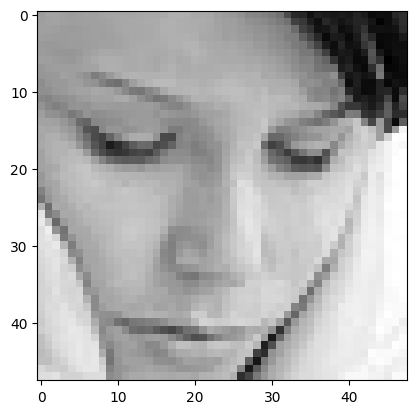

In [29]:
import os

image = 'Dataset/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = loaded_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')


original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
model prediction is sad


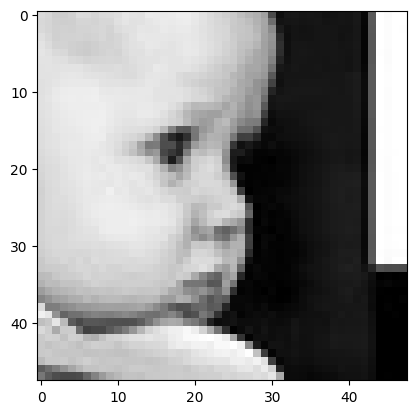

In [30]:
import os

image = 'Dataset/images/train/neutral/12.jpg'
print("original image is of neutral")
img = ef(image)
pred = loaded_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
model prediction is happy


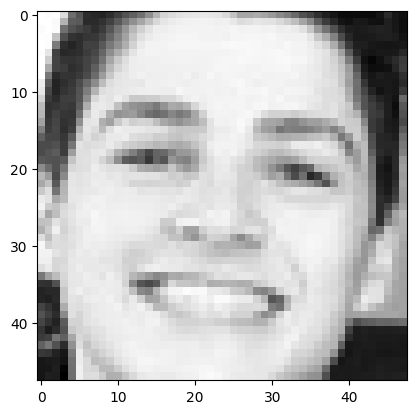

In [31]:
import os

image = 'Dataset/images/train/happy/67.jpg'
print("original image is of happy")
img = ef(image)
pred = loaded_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
model prediction is angry


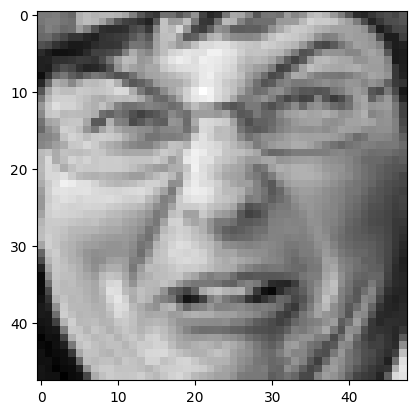

In [32]:
import os

image = 'Dataset/images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = loaded_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
model prediction is surprise


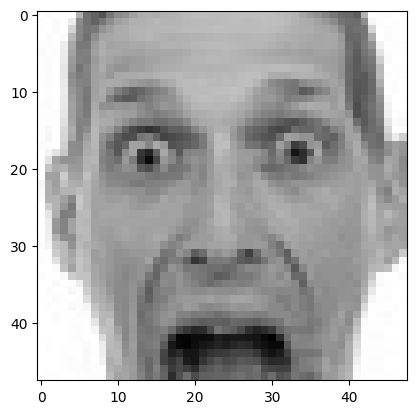

In [33]:
import os

image = 'Dataset/images/train/fear/9.jpg'
print("original image is of fear")
img = ef(image)
pred = loaded_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')